In [1]:
#importing required librabries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style="whitegrid")

In [2]:
#loading dataset
jobdata = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')

**Data Visualization**

In [ ]:
jobdata.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
jobdata.shape

(17880, 18)

In [ ]:
jobdata.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
jobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
jobdata.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


fraudulent
0    17014
1      866
dtype: int64

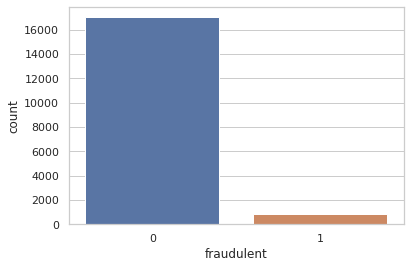

In [ ]:
#Count Plot of fraudulent job
sb.countplot(x='fraudulent', data=jobdata)

jobdata.value_counts('fraudulent')
# 0 - real job
# 1 - fake job

In [ ]:
# Check if there is any null value
jobdata.isna().apply(pd.value_counts)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880.0,17880.0,17534,6333,2868,14572,17879,15185,10670,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0
True,NaN,NaN,346,11547,15012,3308,1,2695,7210,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN


In [ ]:
#checking the number of job posted by function
jobdata.value_counts('function')[:14]

function
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
dtype: int64

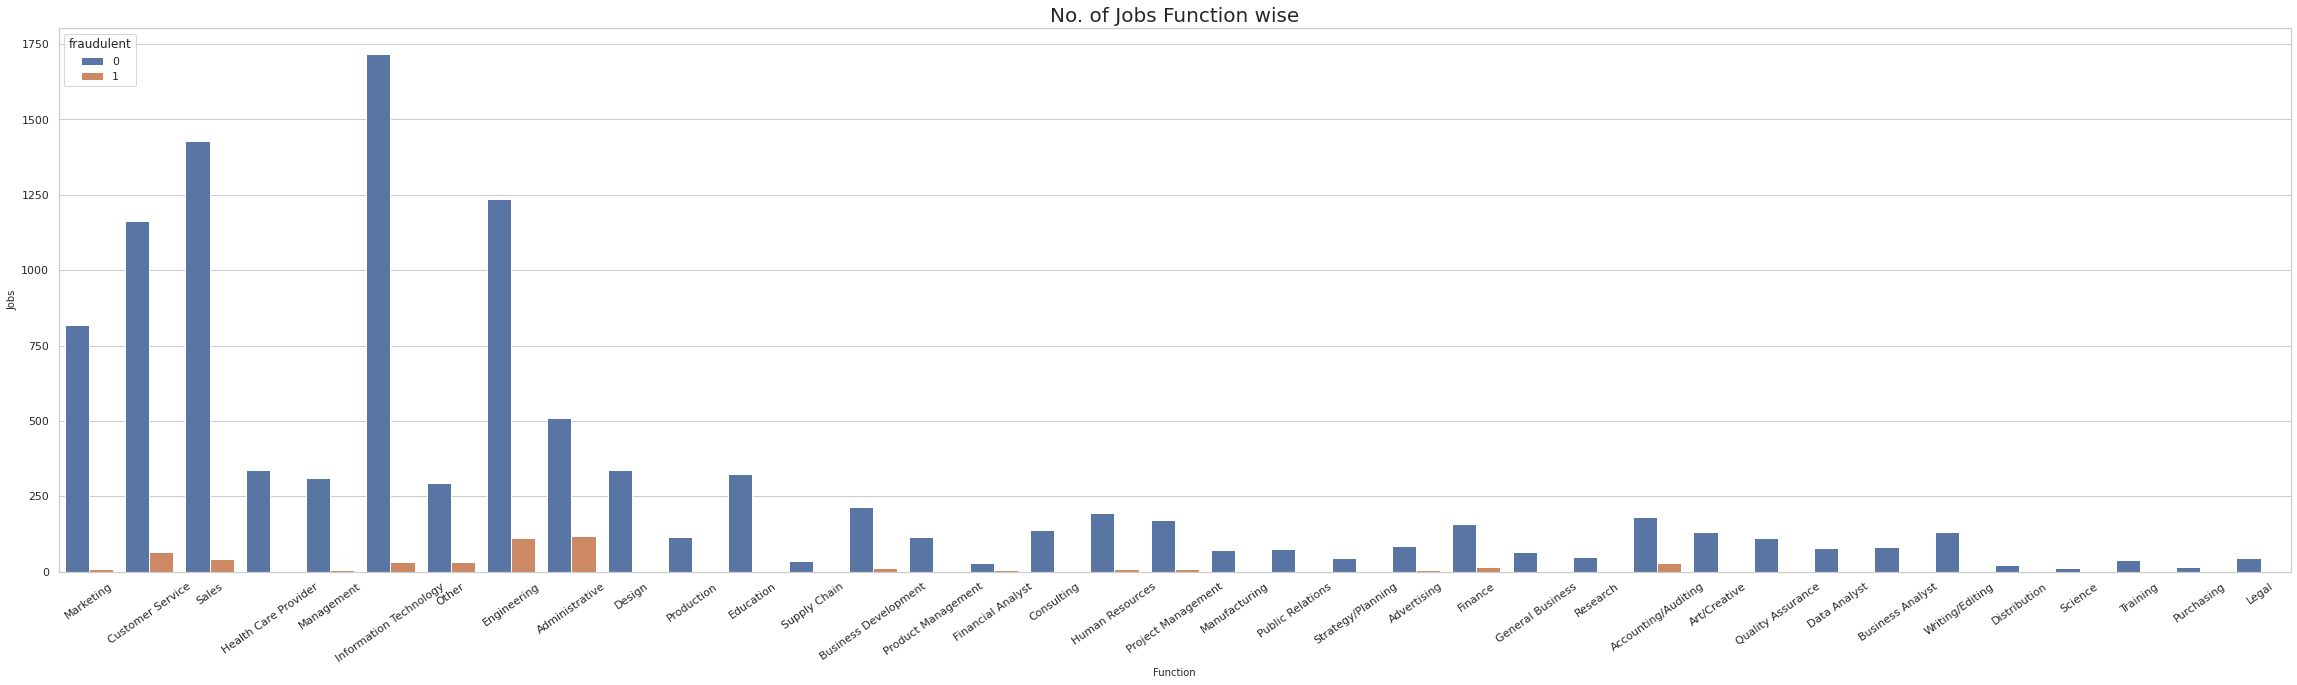

In [ ]:
plt.figure(figsize=(40,10))
sb.countplot(x='function', hue='fraudulent', data=jobdata)
plt.title('No. of Jobs Function wise', size=20)
plt.xlabel('Function', size=10)
plt.ylabel('Jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [ ]:
#checking the number of job posted by Industry
jobdata.value_counts('industry')

industry
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Alternative Dispute Resolution            1
Shipbuilding                              1
Museums and Institutions                  1
Sporting Goods                            1
Ranching                                  1
Length: 131, dtype: int64

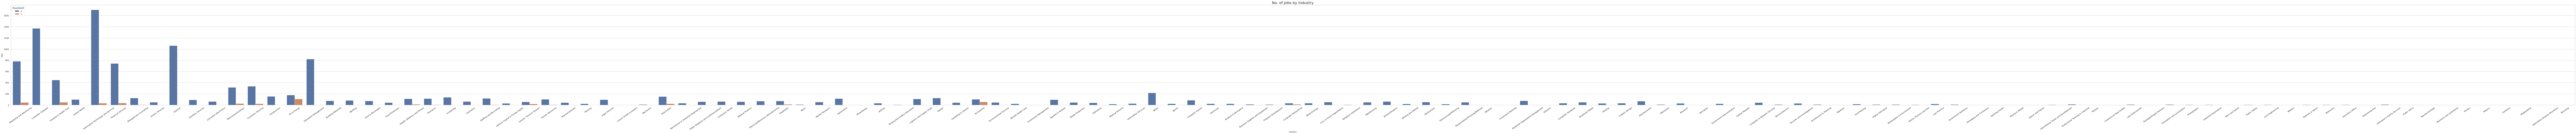

In [ ]:
plt.figure(figsize=(250,10))
sb.countplot(x='industry', hue='fraudulent', data=jobdata)
plt.title('No. of Jobs by Industry', size=20)
plt.xlabel('Industry', size=10)
plt.ylabel('Jobs', size=10)
plt.xticks(rotation=35)
plt.show()

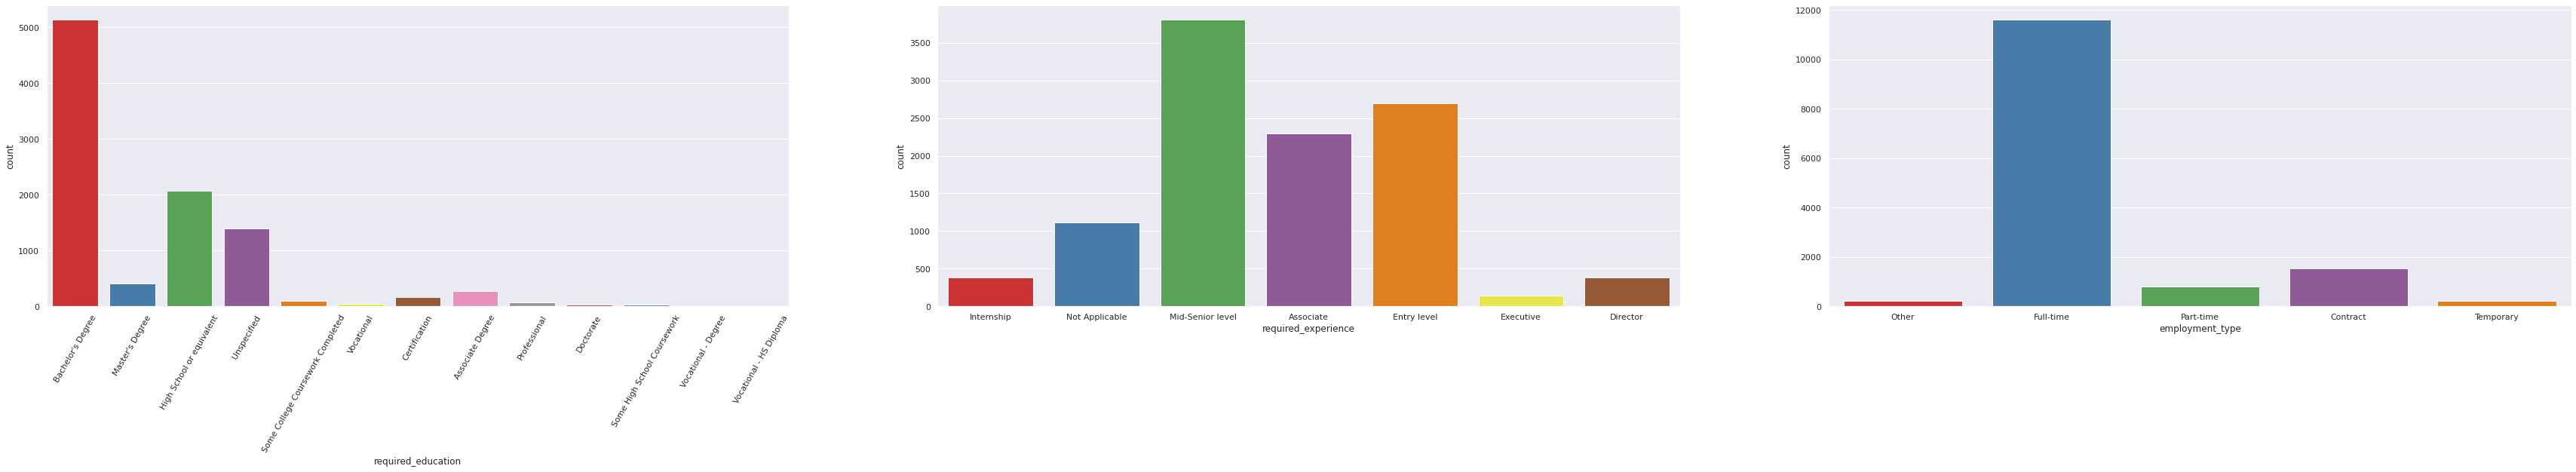

In [ ]:
#Further evaluating Jobs posting Categories
plt.figure(figsize=(60,25))
sb.set_style("darkgrid")

plt.subplot(3,3,1)
sb.countplot(x='required_education',data=jobdata,palette='Set1')
plt.xticks(rotation=60)

plt.subplot(3,3,2)
sb.countplot(x='required_experience',data=jobdata,palette='Set1')

plt.subplot(3,3,3)
sb.countplot(x='employment_type',data=jobdata,palette='Set1')

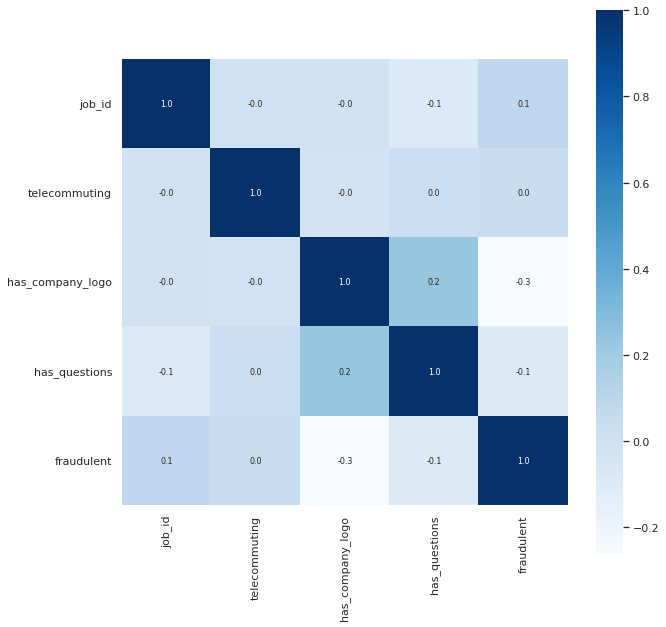

In [ ]:
correlation=jobdata.corr()

#constructing a Heat Map
plt.figure(figsize= (10,10))
sb.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#color dark- positive correlated
#color light- negative correlated
#correlation matrix tells which matrix are important and which are not

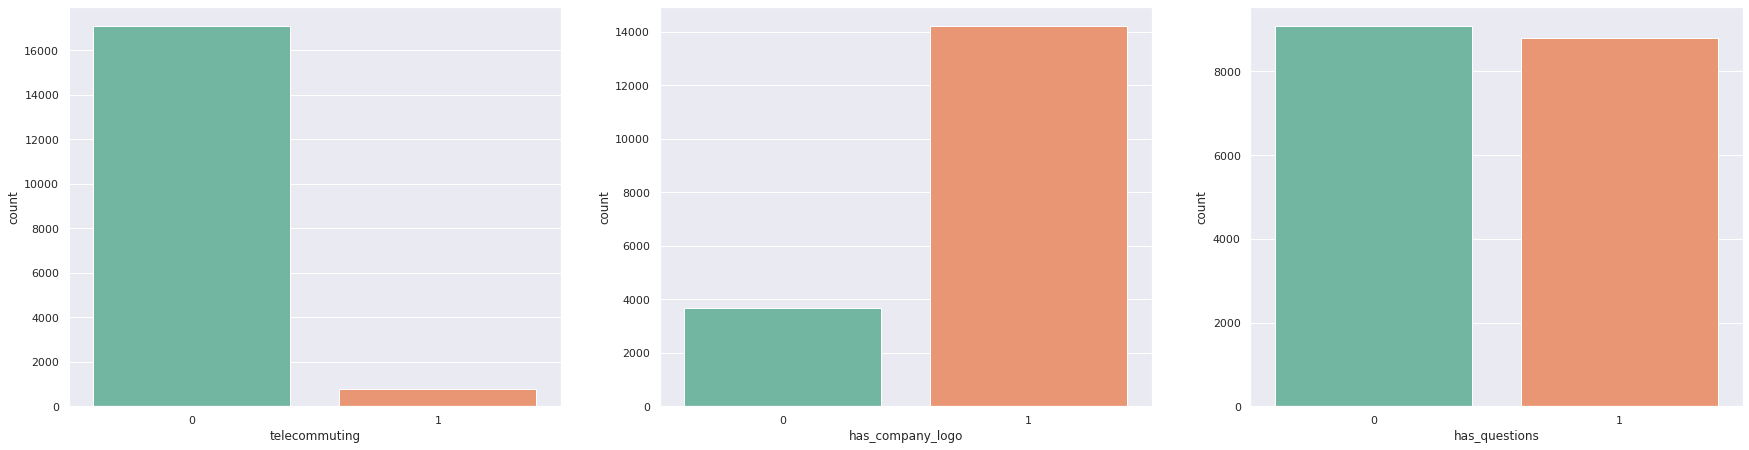

In [ ]:
#Further evaluating Jobs posting Categories
plt.figure(figsize=(30,25))
sb.set_style("darkgrid")

plt.subplot(3,3,1)
sb.countplot(x='telecommuting',data=jobdata,palette='Set2')

plt.subplot(3,3,2)
sb.countplot(x='has_company_logo',data=jobdata,palette='Set2')

plt.subplot(3,3,3)
sb.countplot(x='has_questions',data=jobdata,palette='Set2')

In [ ]:
#checking the number of job posted by Title
jobdata.value_counts('title')

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
                                                     ... 
Performance Marketing Director                          1
Performance Improvement Director                        1
Performance Engineer - World Leaders in CDN Domain      1
Performance Analyst Intern                              1
   Electrician                                          1
Length: 11231, dtype: int64

In [ ]:
Title=dict(jobdata.value_counts('title')[:10])

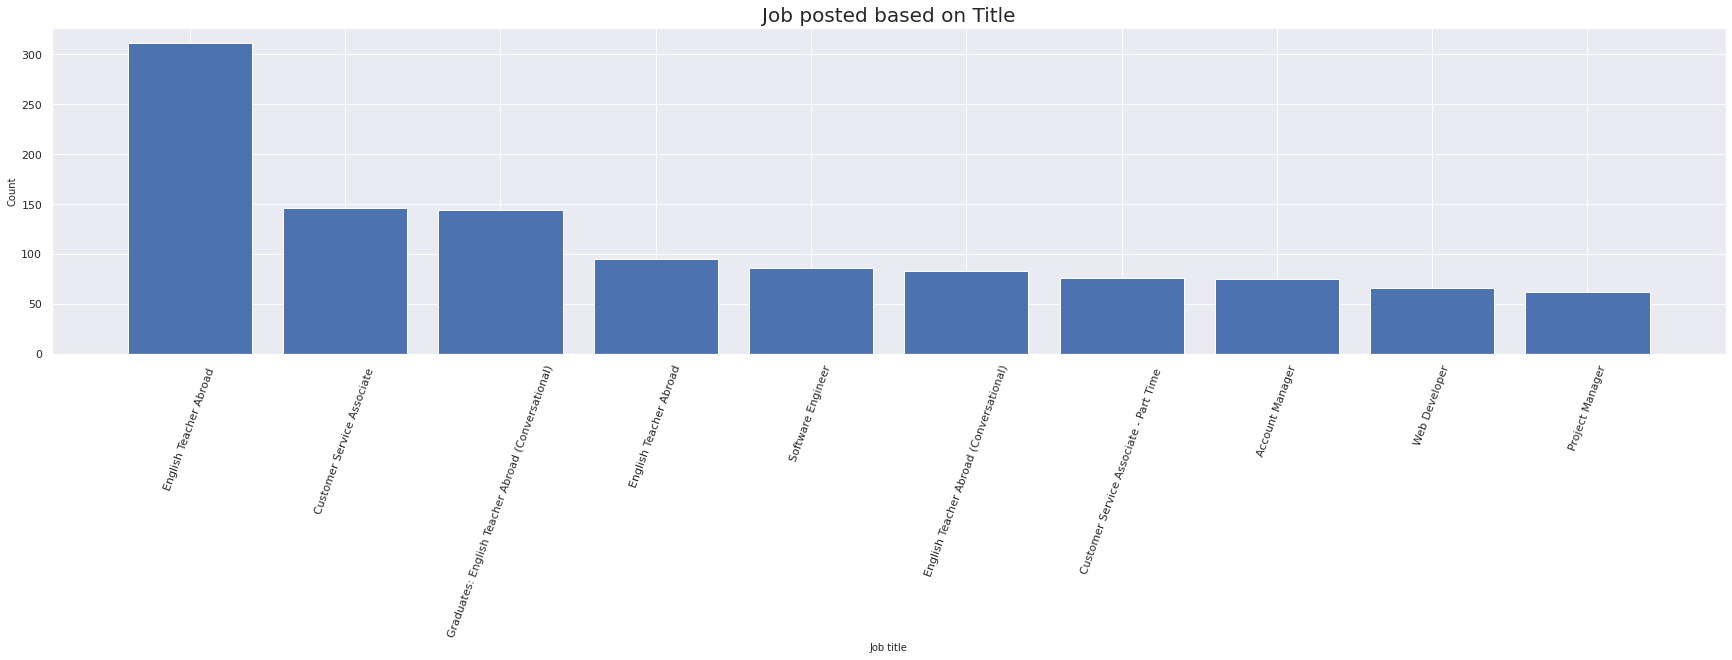

In [ ]:
plt.figure(figsize=(30,6))
plt.bar(Title.keys(), Title.values())
plt.title('Job posted based on Title', size=20)
plt.xlabel('Job title', size=10)
plt.ylabel('Count', size=10)
plt.xticks(rotation=70)
plt.show()

In [ ]:
#number of job posted location wise
jobdata.value_counts('location')

location
GB, LND, London                  718
US, NY, New York                 658
US, CA, San Francisco            472
GR, I, Athens                    464
US, ,                            339
                                ... 
US, AZ, Meas/Chandler/Gilbert      1
US, OH,  Dayton                    1
US, AZ, Mesa/Chandler              1
US, OH,  COLUMBUS                  1
PH, 03,                            1
Length: 3105, dtype: int64

In [ ]:
Location=dict(jobdata.value_counts('location')[:15])

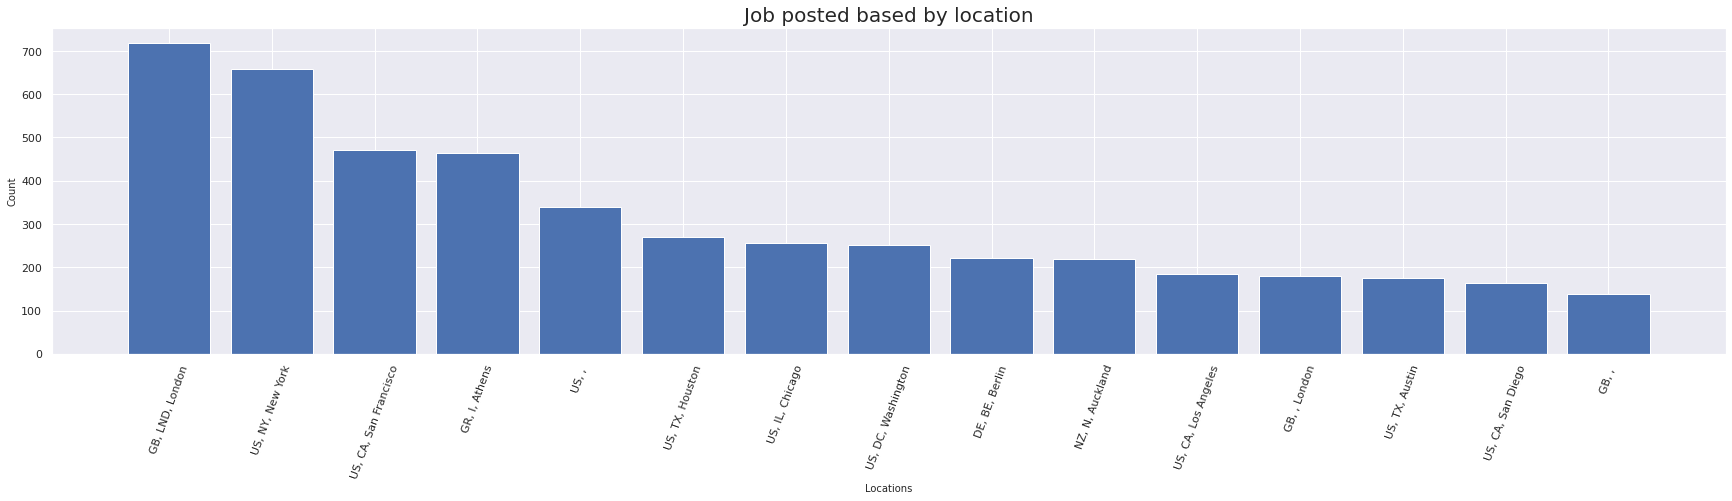

In [ ]:
plt.figure(figsize=(30,6))
plt.bar(Location.keys(), Location.values())
plt.title('Job posted based by location', size=20)
plt.xlabel('Locations', size=10)
plt.ylabel('Count', size=10)
plt.xticks(rotation=70)
plt.show()

In [ ]:
#number of job posted department wise
jobdata.value_counts('department')

department
Sales                      551
Engineering                487
Marketing                  401
Operations                 270
IT                         225
                          ... 
Marekting/PR                 1
Marekting                    1
Marcomm                      1
Manufacturing - Quality      1
Insurance                    1
Length: 1337, dtype: int64

In [ ]:
Dept=dict(jobdata.value_counts('department')[:15])

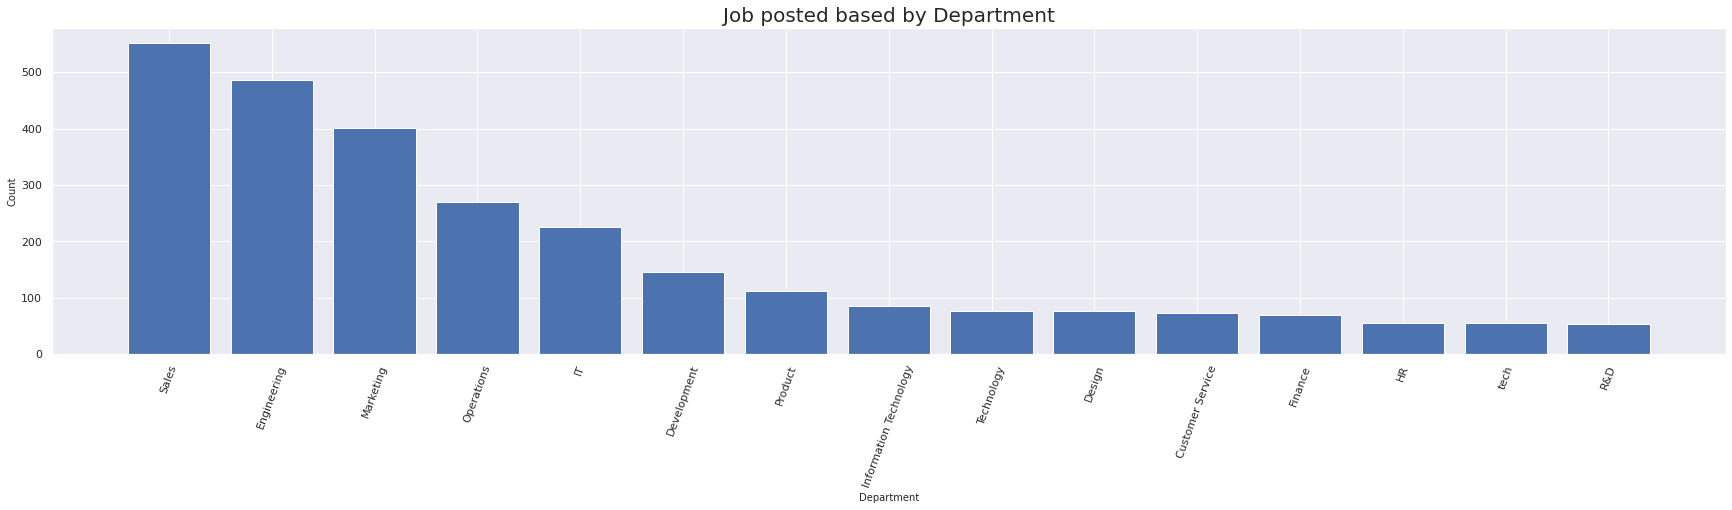

In [ ]:
plt.figure(figsize=(30,6))
plt.bar(Dept.keys(), Dept.values())
plt.title('Job posted based by Department', size=20)
plt.xlabel('Department', size=10)
plt.ylabel('Count', size=10)
plt.xticks(rotation=70)
plt.show()

In [ ]:
jobdata.company_profile.values

array(["We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.",
       '90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Produ

In [ ]:
jobdata.requirements.values

array(['Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours',
       "What we expect from you:Your key responsibility will be to communicate with the client, 90 Seconds team and freelance community t

In [ ]:
jobdata.benefits.values

array([nan,
       'What you will get from usThrough being part of the 90 Seconds team you will gain:experience working on projects located around the world with an international brandexperience working with a variety of clients and on a large range of projectsopportunity to drive and grow production function and teama positive working environment with a great teamPay$40,000-$55,000Applying for this role with a VIDEOBeing a video business, we understand that one of the quickest ways that we can assess your suitability for this role, and one of the quickest ways that you can apply for it, is for you to submit a 60-90 second long video telling us about yourself, your experience and why you think you would be perfect for the role. \xa0It’s not about being a filmmaker or making a really creative video. \xa0A simple video filmed with a smart phone or web cam will be fine. Please also include where you are based and when you can start.You can upload the video onto YouTube or Vimeo (or simila

In [ ]:
jobdata.description.values

array(['Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff',
       "Organised - Focused - Vibrant - Awesome!Do you have a passion for customer s

        Features like company_profile, description, requirements and benefits are complete text- Textual Datasets

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

**Data PreProcessing**

In [ ]:
#Checking for missing values
jobdata.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [3]:
#handling missing values-replacing the categorical features with the most appeared values

jobdata.function.fillna(value = "Information Technology", inplace=True)

In [4]:
jobdata.industry.fillna(value = "Information Technology and Services", inplace=True)

jobdata.required_education.fillna(value = "Bachelor's Degree", inplace=True)

jobdata.required_experience.fillna(value = "Mid-Senior level", inplace=True)

jobdata.employment_type.fillna(value = "Full-time", inplace=True)

jobdata.title.fillna(value = "English Teacher Abroad", inplace=True)

In [5]:
jobdata.location.fillna(value = "GB, LND, London ", inplace=True)

In [6]:
#removed the irrelevent and the features which holds more than 60% missing values
del jobdata['department']
del jobdata['salary_range']
del jobdata['job_id']

#removing the textual datasets too
del jobdata['company_profile']
del jobdata['description']
del jobdata['requirements']
del jobdata['benefits']

#removing telecommuting features too as it has no corelation
jobdata.drop(['telecommuting'],axis=1,inplace=True)

In [7]:
#Checking for missing values
jobdata.isnull().sum()

title                  0
location               0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [8]:
#Check if any duplicate rows in dataset
jobdata.duplicated().sum()

781

In [9]:
#drop the duplicate values
jobdata.drop_duplicates(inplace=True)

In [10]:
jobdata.duplicated().sum()

0

Q1: What are the job titles have most full time job opportunities and how many?

In [ ]:
#Subsetting dataframe which have 'Full-time' emplyment type and also are not fruad.
jobdata_jobs = jobdata[(jobdata['employment_type'] == 'Full-time') & (jobdata['fraudulent']== 0)]

In [ ]:
jobdata_jobs.shape

(13716, 10)

In [ ]:
#Checking the counts of each unique value
jobdata_jobs['title'].value_counts()

Customer Service Associate               118
Software Engineer                         75
Account Manager                           69
Web Developer                             57
Project Manager                           51
                                        ... 
Senior Backend Engineer, Web Services      1
Massage Therapist                          1
Business Planning Analyst                  1
Contract Gameplay Programmer               1
System Analyst/ Programmer                 1
Name: title, Length: 9309, dtype: int64

In [ ]:
jobdata_jobs['title'].value_counts().max()

118

              Ans : Job title 'Customer Service Associate ' has 118 opportunities for a full time job

Q2 : Which industry have the maximum number of fake job postings?

In [ ]:
#Only including rows which are fake job postings.
jobdata_industry = jobdata[jobdata['fraudulent']== 1]

In [ ]:
jobdata_industry.shape

(819, 10)

In [ ]:
#Checking each unique value counts of industry.
jobdata_industry['industry'].value_counts()

Information Technology and Services    297
Oil & Energy                            93
Accounting                              57
Hospital & Health Care                  49
Marketing and Advertising               37
                                      ... 
Civil Engineering                        1
Civic & Social Organization              1
Ranching                                 1
Security and Investigations              1
Wholesale                                1
Name: industry, Length: 62, dtype: int64

                Ans: Industry with, maximum no. of fake job postings : Information Technology and Services

In [11]:
#converting categorical features to numeric
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
jobdata['title'] = le.fit_transform(jobdata['title'])
jobdata['location'] = le.fit_transform(jobdata['location'])
jobdata['employment_type'] = le.fit_transform(jobdata['employment_type'])
jobdata['required_experience'] = le.fit_transform(jobdata['required_experience'])
jobdata['required_education'] = le.fit_transform(jobdata['required_education'])
jobdata['industry'] = le.fit_transform(jobdata['industry'])
jobdata['function'] = le.fit_transform(jobdata['function'])

In [13]:
jobdata.head()

,title,location,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6043,2535,1,0,2,4,1,58,22,0
1,2183,1073,1,0,1,6,1,75,7,0
2,1763,1867,1,0,1,5,1,58,18,0
3,299,1703,1,0,1,5,1,22,31,0
4,975,1741,1,1,1,5,1,51,16,0


In [14]:
jobdata.shape

(17099, 10)

In [15]:
fraud = jobdata[jobdata['fraudulent']== 1]
not_fraud = jobdata[jobdata['fraudulent']== 0]

In [16]:
fraud.shape, not_fraud.shape

((819, 10), (16280, 10))

        The dataset is highly imbalanced

In [17]:
#seperating feature and target
X=jobdata[['has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'title', 'location']].values
Y=jobdata[['fraudulent']].values

In [31]:
#balancing dataset
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [35]:
#implementing oversampling for handling imbalanced

smt = SMOTETomek(random_state=42)
X_res,y_res=smt.fit_resample(X,Y)

In [36]:
X_res.shape, y_res.shape

((31972, 9), (31972,))

Train_Test_Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.2)

In [39]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(25577, 9) (25577,) (6395, 9) (6395,)


>>>>>>>>>>>>>>>>


**Modelling**

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Decision Tree

In [41]:
from sklearn import tree

In [42]:
tree = tree.DecisionTreeClassifier()

In [43]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [44]:
#accuracy score on test data
X_test_prediction = tree.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.96278342455043


In [46]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3158
           1       0.96      0.97      0.96      3237

    accuracy                           0.96      6395
   macro avg       0.96      0.96      0.96      6395
weighted avg       0.96      0.96      0.96      6395



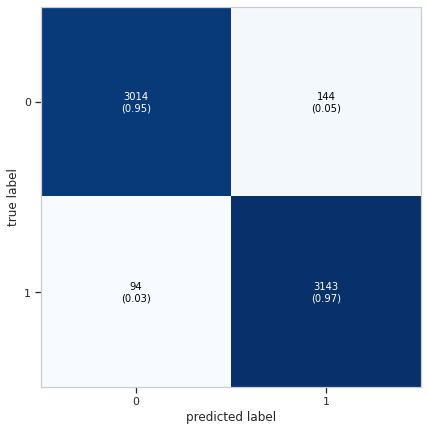

In [47]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);

Random Forest 

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=5)

In [50]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=5)

In [51]:
#accuracy score on test data
X_test_prediction = rfc.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.9741985926505082


In [52]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3158
           1       0.97      0.98      0.97      3237

    accuracy                           0.97      6395
   macro avg       0.97      0.97      0.97      6395
weighted avg       0.97      0.97      0.97      6395

Confusion Matrix

[[3058  100]
 [  65 3172]]


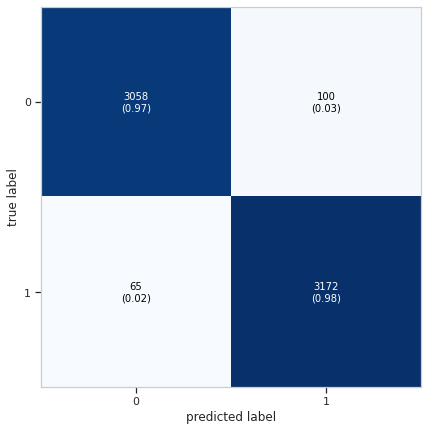

In [53]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);

Support Vector Machine

In [54]:
from sklearn.svm import SVC

In [55]:
svc = SVC()

svc.fit(X_train, Y_train)

SVC()

In [56]:
#accuracy score on test data
X_test_prediction = svc.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.621110242376857


In [57]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3158
           1       0.62      0.64      0.63      3237

    accuracy                           0.62      6395
   macro avg       0.62      0.62      0.62      6395
weighted avg       0.62      0.62      0.62      6395



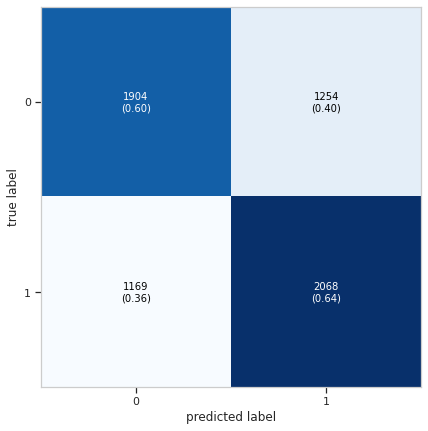

In [58]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);

Data Standardization

In [59]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [60]:
scalar.fit(X_train)

StandardScaler()

In [61]:
X_train_standardized = scalar.transform(X_train)

In [62]:
print(X_train_standardized)

[[ 1.01866738 -0.67863196 -0.09435074 ... -1.08147519 -0.894249
  -0.56054401]
 [-0.9816747  -0.67863196 -0.09435074 ... -1.99985323 -1.41126171
   0.50801875]
 [-0.9816747  -0.67863196 -0.09435074 ... -0.68788459 -1.13503699
   0.82396128]
 ...
 [ 1.01866738  1.47355275 -0.09435074 ...  0.36169032 -0.78218415
  -0.16223075]
 [ 1.01866738 -0.67863196 -0.09435074 ...  1.28006837  0.51292208
   0.83975841]
 [ 1.01866738 -0.67863196 -0.09435074 ...  0.36169032  0.00529859
  -0.71174507]]


In [63]:
X_test_standardized = scalar.transform(X_test)

Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [70]:
lgr.fit(X_train_standardized, Y_train)

LogisticRegression()

In [71]:
#accuracy score on test data
X_test_prediction = lgr.predict(X_test_standardized)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.8308053166536357


K_Nearest_Neighbor-KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train_standardized,Y_train)

KNeighborsClassifier()

In [66]:
#accuracy score on test data
X_test_prediction = knn.predict(X_test_standardized)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of testing data: ', testing_data_accuracy)

Accuracy score of testing data:  0.9483971853010165


In [67]:
print("Classification Report\n")
print(classification_report(Y_test, X_test_prediction))

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3158
           1       0.92      0.98      0.95      3237

    accuracy                           0.95      6395
   macro avg       0.95      0.95      0.95      6395
weighted avg       0.95      0.95      0.95      6395



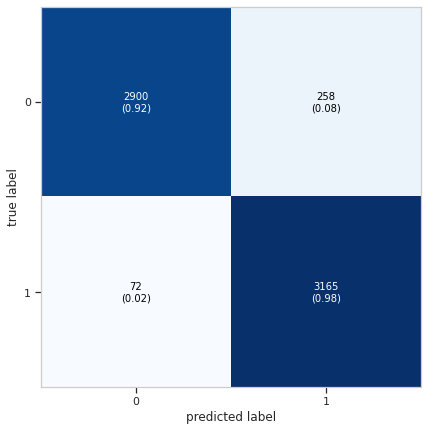

In [68]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),show_normed = True);